In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D
from random import random
#from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import  Ridge
from sklearn.preprocessing import PolynomialFeatures

In [48]:
def regression(model, x_train, y_train, x_test, y_test) :
    std = StandardScaler().fit(x_train)
    regr_type = model.fit(std.transform(x_train),y_train)
    y_predicited = regr_type.predict(std.transform(x_test))
    return y_predicited,regr_type.score(std.transform(x_train),y_train), regr_type.score(std.transform(x_test),y_test), regr_type.coef_   

In [49]:
np.random.seed(0)
x =  np.linspace(-5,10,num=30) #generate the X data  
y = x - 2 * (x ** 2) + 0.2 * (x ** 3)  + np.random.normal(-5, 5, size=x.size) +2 #generate target points y

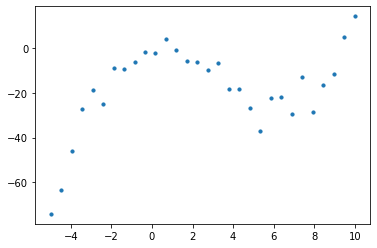

In [50]:
x = x[:, np.newaxis]
y = y[:, np.newaxis]
plt.scatter(x,y, s=10)
plt.show()

Text(0.5, 1.0, 'accuracy = 0.16333333102399328')

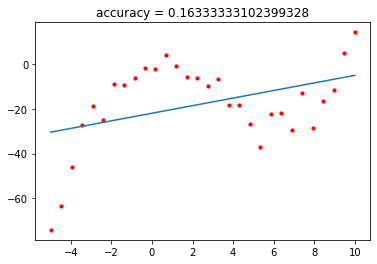

In [51]:
y_pred, score_train, score_test , coef = regression(LinearRegression(), x, y, x, y)
plt.plot(x, y_pred)  #L = 0.0028
plt.scatter(x, y, s=10, color='r')
plt.title('accuracy = {}'.format(score_train))


In [6]:
def polynomial_convert(X,degree):
    '''
    X : like array 
       dataset
    degree : int 
       number of powers
    '''
    return PolynomialFeatures(degree=degree).fit_transform(X)   
   

Text(0.5, 1.0, 'accuracy = 0.955006236426164')

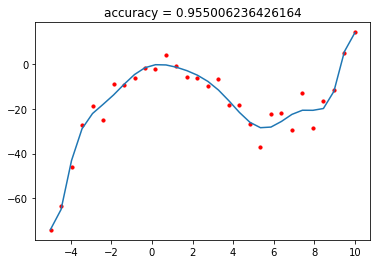

In [7]:
x_poly = polynomial_convert(x, 12)
y_pred, score, score_Test,coef = regression(LinearRegression(), x_poly, y, x_poly, y)
plt.plot(x, y_pred)  #L = 0.0028
plt.scatter(x,y, s=10,color='r')
plt.title('accuracy = {}'.format(score))

<ipython-input-2-bbaa670e0f63>:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regr_type = model.fit(std.transform(x_train),y_train)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 350.81249462872285, tolerance: 1.060514044135277
  model = cd_fast.enet_coordinate_descent(


Text(0.5, 1.0, 'accuracy = 0.9338410468831142')

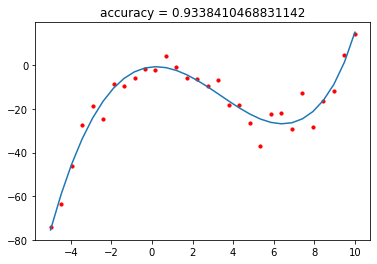

In [8]:
y_pred, score,score_test, coef = regression( Lasso(alpha=0), x_poly, y, x_poly, y)
plt.plot(x, y_pred)  #L = 0.0028
plt.scatter(x,y, s=10,color='r')
plt.title('accuracy = {}'.format(score))

In [9]:
10e+0

10.0

In [10]:
y_pred, score,score_test, coef = regression(LinearRegression(), x_poly, y, x_poly, y)
weights = np.array([])
alphas = [10e-4,10e-3,10e-2,10e-1,1]
print(weights.shape)
for alpha in alphas:
    y_pred, score, score_test,coef = regression( Lasso(alpha=alpha), x_poly, y, x_poly, y)
    if weights.shape[0]>0 : 
        weights = np.vstack([weights,coef])
    else :
        weights = coef
weights = weights.T   


(0,)


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 252.2550689153572, tolerance: 1.060514044135277
  model = cd_fast.enet_coordinate_descent(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7503191693831468, tolerance: 1.060514044135277
  model = cd_fast.enet_coordinate_descent(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7503191693831468, tolerance: 1.060514044135277
  model = cd_fast.enet_coordinate_descent(


In [11]:
weights[1,:]

array([ 3.57925284,  3.66316445,  4.32734531, 10.0508487 , 10.0508487 ])

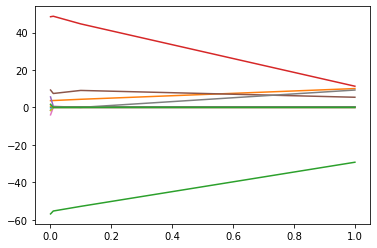

In [13]:
print(weights)

[[  0.           0.           0.           0.           0.        ]
 [  3.57925284   3.66316445   4.32734531  10.0508487   10.0508487 ]
 [-56.92447284 -55.37698777 -52.88751358 -29.3059283  -29.3059283 ]
 [ 48.44741312  48.70328081  44.6197943   11.31607448  11.31607448]
 [  5.58551944   0.54307855   0.           0.           0.        ]
 [  9.27743809   7.4267782    9.05931541   5.41487656   5.41487656]
 [ -3.98976842  -0.           0.           0.           0.        ]
 [ -1.45999352  -0.           0.           9.27059591   9.27059591]
 [ -1.68070415  -0.           0.           0.           0.        ]
 [ -0.26979126  -0.           0.           0.           0.        ]
 [ -0.          -0.           0.           0.           0.        ]
 [  0.71036976  -0.           0.           0.           0.        ]
 [  1.6500049   -0.           0.           0.           0.        ]]


In [14]:
weights = np.array([])
alphas = [1,10,20,30,100]
print(weights.shape)
for alpha in alphas:
    y_pred, score, score_test,coef = regression( Lasso(alpha=alpha), x_poly, y, x_poly, y)
    if weights.shape[0]>0 : 
        weights = np.vstack([weights,coef])
    else :
        weights = coef
weights = weights.T   

(0,)


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7503191693831468, tolerance: 1.060514044135277
  model = cd_fast.enet_coordinate_descent(


In [15]:
weights

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [ 10.0508487 ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [-29.3059283 ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [ 11.31607448,   0.        ,   0.        ,   0.        ,
          0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [  5.41487656,   0.        ,   0.        ,   0.        ,
          0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [  9.27059591,   0.        ,   0.        ,   0.        ,
          0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [  0.        ,   0.        ,   0.   

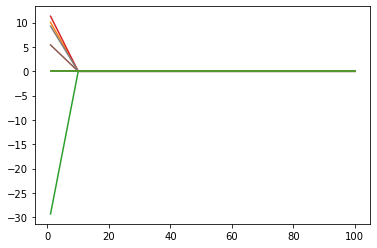

In [16]:

for i in range(weights.shape[0]):
    plt.plot(np.array(alphas),(weights[i,:]))

In [17]:
weights = np.array([])
alphas = [10e-4,10e-3,10e-2,10e-1,1,10,20,30,100]
print(weights.shape)
for alpha in alphas:
    y_pred, score, score_test,coef = regression( Lasso(alpha=alpha), x_poly, y, x_poly, y)
    if weights.shape[0]>0 : 
        weights = np.vstack([weights,coef])
    else :
        weights = coef
weights = weights.T   


(0,)


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 252.2550689153572, tolerance: 1.060514044135277
  model = cd_fast.enet_coordinate_descent(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7503191693831468, tolerance: 1.060514044135277
  model = cd_fast.enet_coordinate_descent(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7503191693831468, tolerance: 1.060514044135277
  model = cd_fast.enet_coordinate_descent(


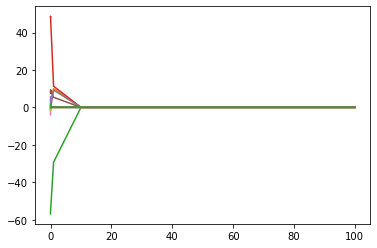

In [18]:
for i in range(weights.shape[0]):
    plt.plot(np.array(alphas),(weights[i,:]))

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
 X_train, X_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.33, random_state=42)

In [21]:
weights = np.array([])
alphas = [10e-4,10e-3,10e-2,10e-1,10,100,1000]
scores =[]
scores_test = []
print(weights.shape)
for alpha in alphas:
    y_pred, score, score_test, coef = regression( Lasso(alpha=alpha), X_train, y_train, X_test, y_test)
    scores.append(score)
    scores_test.append(score_test)
    if weights.shape[0]>0 : 
        weights = np.vstack([weights,coef])
    else :
        weights = coef
weights = weights.T   

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 183.95769637042758, tolerance: 0.5934978150157347
  model = cd_fast.enet_coordinate_descent(


(0,)


In [22]:
scores

[0.9183333667970135,
 0.9174901357160672,
 0.9155462030892262,
 0.7292285818020796,
 0.0,
 0.0,
 0.0]

In [23]:
x_label=np.linspace(0,1,len(scores))

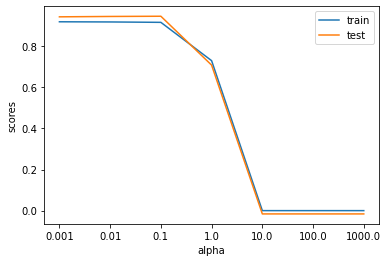

In [24]:
plt.plot(x_label,scores,label='train')
plt.plot(x_label,scores_test,label='test')
plt.xlabel('alpha')
plt.ylabel('scores')
plt.xticks(x_label, np.array(alphas).astype(str))
plt.legend()

In [25]:
a = np.array2string(np.array(alphas), precision=5, separator=',',
                      suppress_small=True)
type(a)

str

<h2> Cross-validation </h2>


In [26]:
y[[1,2,3]]

array([[-63.68854111],
       [-45.99429237],
       [-27.22544093]])

In [27]:
from sklearn.model_selection import KFold

In [28]:
kfold = KFold(3, True, 1)
# enumerate splits
for train, test in kfold.split(x_poly):
    print('train: %s, test: %s' % (train, test))

train: [ 0  1  2  4  5  6  7  8  9 11 12 13 15 16 18 23 25 27 28 29], test: [ 3 10 14 17 19 20 21 22 24 26]
train: [ 0  3  5  8  9 10 11 12 14 15 16 17 19 20 21 22 24 26 28 29], test: [ 1  2  4  6  7 13 18 23 25 27]
train: [ 1  2  3  4  6  7 10 13 14 17 18 19 20 21 22 23 24 25 26 27], test: [ 0  5  8  9 11 12 15 16 28 29]


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass shuffle=True, random_state=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [29]:
def cross_vall(model, x, y, cv=5):
    kfold = KFold(3, True, 1)
    scores= []
    for train, test in kfold.split(x_poly):
        score = model.fit(x[train],y[train]).score(x[test],y[test])
        scores.append(score)
    return scores    

In [30]:
cross_vall(Lasso(alpha=0.1),x_poly,y)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 108.32802013684861, tolerance: 0.9617654875600394
  model = cd_fast.enet_coordinate_descent(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 251.652860909756, tolerance: 0.6905538746501787
  model = cd_fast.enet_coordinate_descent(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 230.53062607405334, tolerance: 0.4184344721707994
  model = cd_fast.enet_coordinate_descent(


[0.30328400942066325, 0.8992396599550975, 0.9145082929591661]

In [31]:
scores = []
for alpha in alphas:
    scores.append(np.array(cross_vall(Lasso(alpha=alpha),x_poly,y)).mean())
    

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass shuffle=True, random_state=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100.50779679027899, tolerance: 0.9617654875600394
  model = cd_fast.enet_coordinate_descent(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 244.42575236738816, tolerance: 0.6905538746501787
  model = cd_fast.enet_coordinate_descent(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Conve

In [32]:
scores

[0.7030654107621878,
 0.7033093027592846,
 0.705677320778309,
 0.7218451095772739,
 0.65294725039533,
 0.46348314189239287,
 0.5176988481446659]

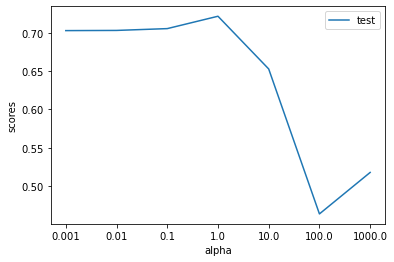

In [33]:

plt.plot(x_label,scores,label='test')
plt.xlabel('alpha')
plt.ylabel('scores')
plt.xticks(x_label, np.array(alphas).astype(str))
plt.legend()

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7503191693831468, tolerance: 1.060514044135277
  model = cd_fast.enet_coordinate_descent(


Text(0.5, 1.0, 'accuracy = 0.7899509312423073')

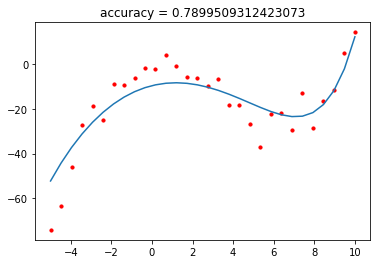

In [43]:
y_pred, score,score_test, coef = regression( Lasso(alpha=1), x_poly, y, x_poly, y)
plt.plot(x, y_pred)  #L = 0.0028
plt.scatter(x,y, s=10,color='r')
plt.title('accuracy = {}'.format(score))

In [44]:
coef

array([  0.        ,  10.0508487 , -29.3059283 ,  11.31607448,
         0.        ,   5.41487656,   0.        ,   9.27059591,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ])

In [36]:
from sklearn.model_selection import cross_val_score
# evaluate model

# force scores to be positive
scores = []
cv =  kfold = KFold(3, True, 1)
for alpha in alphas:
    scores.append(cross_val_score(Lasso(alpha=alpha), x_poly, y, cv=cv).mean())


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass shuffle=True, random_state=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100.50779679027899, tolerance: 0.9617654875600394
  model = cd_fast.enet_coordinate_descent(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 244.42575236738816, tolerance: 0.6905538746501787
  model = cd_fast.enet_coordinate_descent(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Conve

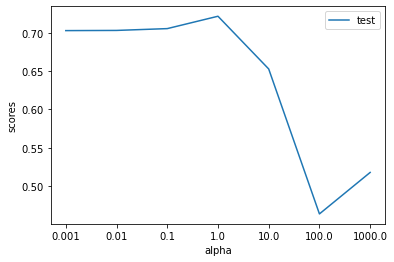

In [37]:
plt.plot(x_label,scores,label='test')
plt.xlabel('alpha')
plt.ylabel('scores')
plt.xticks(x_label, np.array(alphas).astype(str))
plt.legend()

Text(0.5, 1.0, 'accuracy = 0.9319986935578851')

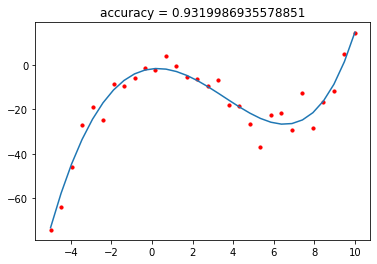

In [41]:
y_pred, score,score_test, coef = regression( Lasso(alpha=0.1), x_poly, y, x_poly, y)
plt.plot(x, y_pred)  #L = 0.0028
plt.scatter(x,y, s=10,color='r')
plt.title('accuracy = {}'.format(score))

In [42]:
coef

array([  0.        ,   4.32734531, -52.88751358,  44.6197943 ,
         0.        ,   9.05931541,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ])